# Exploratory data analysis

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas line plots
- prepare data

In [114]:
stock_data = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')

In [115]:
stock_data.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [116]:
stock_data_t = stock_data.T
stock_data_t.columns = stock_data_t.iloc[0]
stock_data_t = stock_data_t.drop(['name'])
stock_data_t.rename(columns={'name':'Month'}, inplace=True)
stock_data_t['Month'] = stock_data_t.index
stock_data_t.head()

name,IBM,MSFT,GOOGLE,APPLE,Month
Jan,156.08,45.51,512.42,110.64,Jan
Feb,160.01,43.08,537.99,125.43,Feb
Mar,159.81,42.13,559.72,125.97,Mar
Apr,165.22,43.47,540.5,127.29,Apr
May,172.25,47.53,535.24,128.76,May


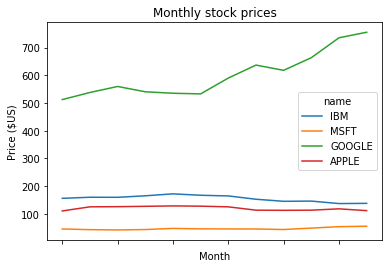

In [117]:
stock_data_t.plot(x='Month', y=['IBM','MSFT', 'GOOGLE', 'APPLE'])
plt.title('Monthly stock prices')
plt.ylabel('Price ($US)')
plt.savefig('stock_prices.png')
plt.show()

Pandas scatter plots

In [118]:
auto_mpg = pd.read_csv('auto-mpg.csv')
auto_mpg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


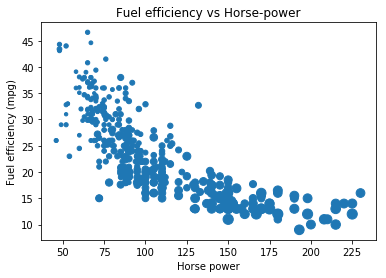

In [119]:
sizes = np.array([ 51.12044694,  56.78387977,  49.15557238,  49.06977358,
        49.52823321,  78.4595872 ,  78.93021696,  77.41479205,
        81.52541106,  61.71459825,  52.85646225,  54.23007578,
        58.89427963,  39.65137852,  23.42587473,  33.41639502,
        32.03903011,  27.8650165 ,  18.88972581,  14.0196956 ,
        29.72619722,  24.58549713,  23.48516821,  20.77938954,
        29.19459189,  88.67676838,  79.72987328,  79.94866084,
        93.23005042,  18.88972581,  21.34122243,  20.6679223 ,
        28.88670381,  49.24144612,  46.14174741,  45.39631334,
        45.01218186,  73.76057586,  82.96880195,  71.84547684,
        69.85320595, 102.22421043,  93.78252358, 110.        ,
        36.52889673,  24.14234281,  44.84805372,  41.02504618,
        20.51976563,  18.765772  ,  17.9095202 ,  17.75442285,
        13.08832041,  10.83266174,  14.00441945,  15.91328975,
        21.60597587,  18.8188451 ,  21.15311208,  24.14234281,
        20.63083317,  76.05635059,  80.05816704,  71.18975117,
        70.98330444,  56.13992036,  89.36985382,  84.38736544,
        82.6716892 ,  81.4149056 ,  22.60363518,  63.06844313,
        69.92143863,  76.76982089,  69.2066568 ,  35.81711267,
        26.25184749,  36.94940537,  19.95069229,  23.88237331,
        21.79608472,  26.1474042 ,  19.49759118,  18.36136808,
        69.98970461,  56.13992036,  66.21810474,  68.02351436,
        59.39644014, 102.10046481,  82.96880195,  79.25686195,
        74.74521151,  93.34830013, 102.05923292,  60.7883734 ,
        40.55589449,  44.7388015 ,  36.11079464,  37.9986264 ,
        35.11233175,  15.83199594, 103.96451839, 100.21241654,
        90.18186347,  84.27493641,  32.38645967,  21.62494928,
        24.00218436,  23.56434276,  18.78345471,  22.21725537,
        25.44271071,  21.36007926,  69.37650986,  76.19877818,
        14.51292942,  19.38962134,  27.75740889,  34.24717407,
        48.10262495,  29.459795  ,  32.80584831,  55.89556844,
        40.06360581,  35.03982309,  46.33599903,  15.83199594,
        25.01226779,  14.03498009,  26.90404245,  59.52231336,
        54.92349014,  54.35035315,  71.39649768,  91.93424995,
        82.70879915,  89.56285636,  75.45251972,  20.50128352,
        16.04379287,  22.02531454,  11.32159874,  16.70430249,
        18.80114574,  18.50153068,  21.00322336,  25.79385418,
        23.80266582,  16.65430211,  44.35746794,  49.815853  ,
        49.04119063,  41.52318884,  90.72524338,  82.07906251,
        84.23747672,  90.29816462,  63.55551901,  63.23059357,
        57.92740995,  59.64831981,  38.45278922,  43.19643409,
        41.81296121,  19.62393488,  28.99647648,  35.35456858,
        27.97283229,  30.39744886,  20.57526193,  26.96758278,
        37.07354237,  15.62160631,  42.92863291,  30.21771564,
        36.40567571,  36.11079464,  29.70395123,  13.41514444,
        25.27829944,  20.51976563,  27.54281821,  21.17188565,
        20.18836167,  73.97101962,  73.09614831,  65.35749368,
        73.97101962,  43.51889468,  46.80945169,  37.77255674,
        39.6256851 ,  17.24230306,  19.49759118,  15.62160631,
        13.41514444,  55.49963323,  53.18333207,  55.31736854,
        42.44868923,  13.86730874,  16.48817545,  19.33574884,
        27.3931002 ,  41.31307817,  64.63368105,  44.52069676,
        35.74387954,  60.75655952,  79.87569835,  68.46177648,
        62.35745431,  58.70651902,  17.41217694,  19.33574884,
        13.86730874,  22.02531454,  15.75091031,  62.68013142,
        68.63071356,  71.36201911,  76.80558184,  51.58836621,
        48.84134317,  54.86301837,  51.73502816,  74.14661842,
        72.22648148,  77.88228247,  78.24284811,  15.67003285,
        31.25845963,  21.36007926,  31.60164234,  17.51450098,
        17.92679488,  16.40542438,  19.96892459,  32.99310928,
        28.14577056,  30.80379718,  16.40542438,  13.48998471,
        16.40542438,  17.84050478,  13.48998471,  47.1451025 ,
        58.08281541,  53.06435374,  52.02897659,  41.44433489,
        36.60292926,  30.80379718,  48.98404972,  42.90189859,
        47.56635225,  39.24128299,  54.56115914,  48.41447259,
        48.84134317,  49.41341845,  42.76835191,  69.30854366,
        19.33574884,  27.28640858,  22.02531454,  20.70504474,
        26.33555201,  31.37264569,  33.93740821,  24.08222494,
        33.34566004,  41.05118927,  32.52595611,  48.41447259,
        16.48817545,  18.97851406,  43.84255439,  37.22278157,
        34.77459916,  44.38465193,  47.00510227,  61.39441929,
        57.77221268,  65.12675249,  61.07507305,  79.14790534,
        68.42801405,  54.10993164,  64.63368105,  15.42864956,
        16.24054679,  15.26876826,  29.68171358,  51.88189829,
        63.32798377,  42.36896092,  48.6988448 ,  20.15170555,
        19.24612787,  16.98905358,  18.88972581,  29.68171358,
        28.03762169,  30.35246559,  27.20120517,  19.13885751,
        16.12562794,  18.71277385,  16.9722369 ,  29.85984799,
        34.29495526,  37.54716158,  47.59450219,  19.93246832,
        30.60028577,  26.90404245,  24.66650366,  21.36007926,
        18.5366546 ,  32.64243213,  18.5366546 ,  18.09999962,
        22.70075058,  36.23351603,  43.97776651,  14.24983724,
        19.15671509,  14.17291518,  35.25757392,  24.38356372,
        26.02234705,  21.83420642,  25.81458463,  28.90864169,
        28.58044785,  30.91715052,  23.6833544 ,  12.82391671,
        14.63757021,  12.89709155,  17.75442285,  16.24054679,
        17.49742615,  16.40542438,  20.42743834,  17.41217694,
        23.58415722,  19.96892459,  20.33531923,  22.99334585,
        28.47146626,  28.90864169,  43.43816712,  41.57579979,
        35.01567018,  35.74387954,  48.5565546 ,  57.77221268,
        38.98605581,  49.98882458,  28.25412762,  29.01845599,
        23.88237331,  27.60710798,  26.54539622,  31.14448175,
        34.17556473,  16.3228815 ,  17.0732619 ,  16.15842026,
        18.80114574,  18.80114574,  19.42557798,  20.2434083 ,
        20.98452475,  16.07650192,  16.07650192,  16.57113469,
        36.11079464,  37.84783835,  27.82194848,  33.46359332,
        29.5706502 ,  23.38638738,  36.23351603,  32.40968826,
        18.88972581,  21.92965639,  28.68963762,  30.80379718])
auto_mpg.plot(kind='scatter', x='hp', y='mpg', s=sizes)
plt.title('Fuel efficiency vs Horse-power')
plt.xlabel('Horse power')
plt.ylabel('Fuel efficiency (mpg)')
plt.savefig('Fuel_efficiency.png')
plt.show()

Pandas box plot

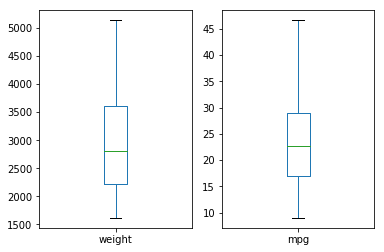

In [120]:
auto_mpg[['weight', 'mpg']].plot(subplots=True, kind='box')
plt.savefig('box_plot_auto.png')
plt.show()

Pandas hist, pdf and cdf
PDF - probability density function
CDF - cumulative density function

In [121]:
tips = pd.read_csv('tips.csv')
tips['fraction'] = tips.tip/tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


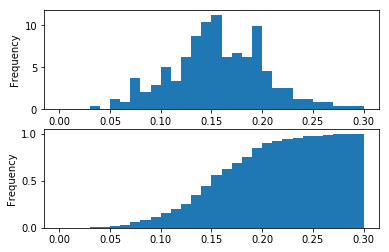

In [122]:
# Format plots such that they apper on separate rows
fig, axes = plt.subplots(nrows=2,ncols=1)
tips.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))
tips.fraction.plot(ax=axes[1], kind='hist', bins=30, density=True, cumulative=True, range=(0,.3))
plt.savefig('pdf_cdf.png')
plt.show()

Median

In [123]:
auto_mpg['mpg'].median()

22.75

Min, max and mean

In [124]:
degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [125]:
degrees['Engineering'].min()

0.8

In [126]:
degrees['Engineering'].max()

19.0

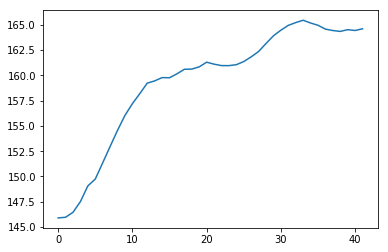

In [130]:
# Mean percentage per year
mean = degrees.mean(axis='columns')
mean.plot()
plt.show()

Median vs mean - In many data sets, there can be large differences in the mean and median value due to the presence of outliers

In [131]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [132]:
titanic.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

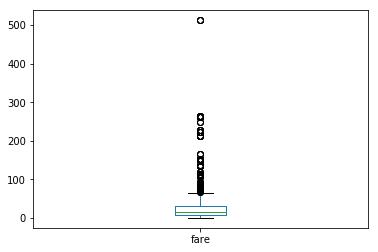

In [133]:
titanic.fare.plot(kind='box')
plt.show()

Quantiles and # of values

In [137]:
life_exp = pd.read_csv('life_expectancy_at_birth.csv')
life_exp.head()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [138]:
life_exp['2015'].count()

208

In [139]:
life_exp.quantile([0.05,0.95])

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,12.95,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,246.05,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


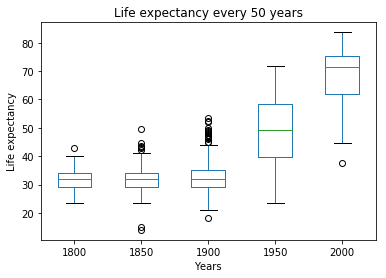

In [141]:
years = ['1800','1850','1900','1950','2000']
life_exp[years].plot(kind='box')
plt.title('Life expectancy every 50 years')
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.savefig('life_exp_box.png')
plt.show()

Mean and standard deviation

In [143]:
print(life_exp['1900'].mean())
print(life_exp['1900'].std())

33.013383084577114
6.336988677401311


Separate and summarize

In [146]:
global_mean = auto_mpg.mean()
print(global_mean)
global_std = auto_mpg.std()
print(global_std)

mpg         23.445918
cyl          5.471939
displ      194.411990
hp         104.469388
weight    2977.584184
accel       15.541327
yr          75.979592
dtype: float64
mpg         7.805007
cyl         1.705783
displ     104.644004
hp         38.491160
weight    849.402560
accel       2.758864
yr          3.683737
dtype: float64


In [148]:
us = auto_mpg[auto_mpg['origin']=='US']

us_mean = us.mean()
us_std = us.std()

In [149]:
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


Separate and plot

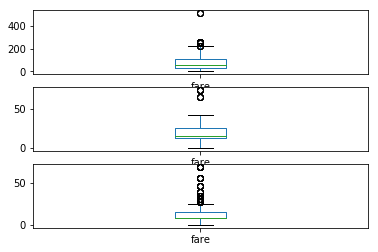

In [151]:
fig, axes = plt.subplots(nrows=3,ncols=1)
titanic.loc[titanic['pclass']==1].plot(ax=axes[0], y='fare', kind='box')
titanic.loc[titanic['pclass']==2].plot(ax=axes[1], y='fare', kind='box')
titanic.loc[titanic['pclass']==3].plot(ax=axes[2], y='fare', kind='box')
plt.show()